
# Heart Stroke Prediciton
Life cycle of Machine learning Project

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
df = pd.read_csv((Path("data\healthcare-dataset-stroke-data.csv")))
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df['age'].value_counts().unique()


array([102,  95,  90,  87,  86,  85,  83,  80,  79,  77,  76,  75,  74,
        73,  72,  71,  70,  68,  66,  65,  64,  62,  61,  60,  59,  58,
        57,  56,  55,  54,  53,  52,  51,  50,  49,  47,  46,  45,  42,
        40,  38,  36,  35,  34,  32,  24,   9,   8,   6,   5,   4,   3,
         2])

In [11]:
df[df['age'] ==2]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
437,5010,Female,2.0,0,0,No,children,Rural,92.48,18.0,Unknown,0
683,15274,Female,2.0,0,0,No,children,Rural,79.89,31.6,Unknown,0
750,8320,Male,2.0,0,0,No,children,Rural,73.62,20.8,Unknown,0
783,14387,Male,2.0,0,0,No,children,Urban,93.88,17.4,Unknown,0
830,65218,Male,2.0,0,0,No,children,Rural,109.10,20.0,Unknown,0
856,71929,Male,2.0,0,0,No,children,Rural,56.77,20.9,Unknown,0
986,46323,Female,2.0,0,0,No,children,Rural,165.11,18.0,Unknown,0
1132,46072,Male,2.0,0,0,No,children,Rural,103.25,19.4,Unknown,0
1182,63565,Female,2.0,0,0,No,children,Rural,125.68,20.1,Unknown,0
1185,26389,Female,2.0,0,0,No,children,Urban,120.85,16.2,Unknown,0


In [12]:

df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [14]:
for i in  df.columns:
    print( i, '\t ',df[i].unique())

id 	  [ 9046 51676 31112 ... 19723 37544 44679]
gender 	  ['Male' 'Female' 'Other']
age 	  [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [18]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000



# Statistical Inferences
* Median age of population is 43 years.
* 25% of the population is aged below 25
* Another 25% is aged above 60 and remaining in between these ages.
* Average glucose levels of the population is 106
* About 9.7% and 5.4% of population suffers from hypertension and heart disease respectively.
* People with higher BMI (BMI > 45) are less represented. This can affect our machine learning models significantly.

In [25]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [27]:
numerical_features = [ i for i in df.columns if df[i].dtype !='O']
categorical_feaures =[i for i in df.columns if df[i].dtype=="O"]

# # define numerical & categorical columns
# numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
# categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('numerical categorical',numerical_features)
print('categories',categorical_feaures)

numerical categorical ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
categories ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [30]:
for i in categorical_feaures:
    print(i,'\t',df[i].value_counts(normalize=True) * 100)
    print('---------------------------')

gender 	 gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64
---------------------------
ever_married 	 ever_married
Yes    65.616438
No     34.383562
Name: proportion, dtype: float64
---------------------------
work_type 	 work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64
---------------------------
Residence_type 	 Residence_type
Urban    50.802348
Rural    49.197652
Name: proportion, dtype: float64
---------------------------
smoking_status 	 smoking_status
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: proportion, dtype: float64
---------------------------


# Univiriate analysis

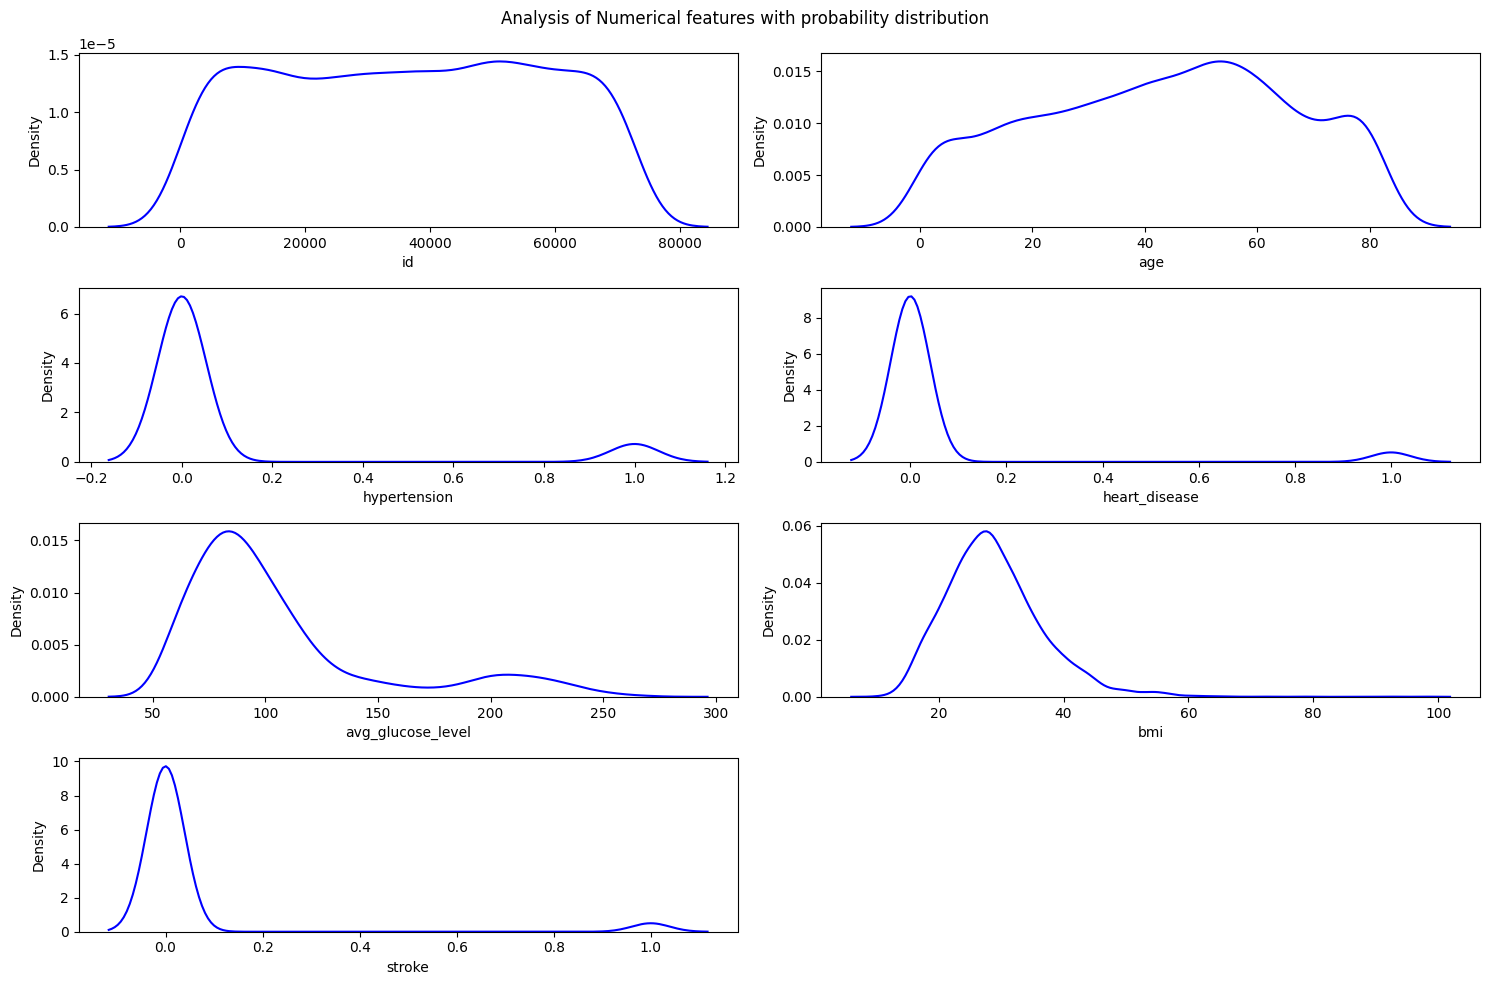

In [36]:
plt.figure(figsize=(15, 10))
plt.suptitle('Analysis of Numerical features with probability distribution')

for i in range(0, len(numerical_features)):
    plt.subplot(4, 2, i + 1)
    sns.kdeplot(x=df[numerical_features[i]], color='blue')
    plt.xlabel(numerical_features[i])

    plt.tight_layout()

# Specify the path to save the image
plt.savefig('./images/numerical_features_distribution.png')

# Close the plot to free up memory
# plt.close()

In [38]:
plt.figure(figsize=(15, 10))
plt.suptitle('Analysis of Numerical features with Barplot')

for i in range(0, len(numerical_features)):
    plt.subplot(4, 2, i + 1)
    sns.barplot(x=df[numerical_features[i]], color='blue')
    plt.xlabel(numerical_features[i])

    plt.tight_layout()

# Specify the path to save the image
plt.savefig('./images/bar_plot_distribution.png')

# Close the plot to free up memory
# plt.close()

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Assume 'df' is your DataFrame with the features

# Create the "images" folder if it doesn't exist
if not os.path.exists('./images'):
    os.makedirs('./images')

# Create a bar plot for each feature
for feature in df.columns:
    plt.figure(figsize=(10, 6))
    plt.bar(df.index, df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.savefig('./images/{}.png'.format(feature))
    plt.close()

# Create a scatter plot for each pair of features
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        plt.figure(figsize=(10, 6))
        plt.scatter(df[df.columns[i]], df[df.columns[j]])
        plt.title(f'Relationship between {df.columns[i]} and {df.columns[j]}')
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j])
        plt.savefig('./images/{}_vs_{}.png'.format(df.columns[i], df.columns[j]))
        plt.close()

In [50]:
import plotly.express as px
import pandas as pd

# Assume 'df' is your DataFrame with the features

# Create a bar plot for each feature
for feature in df.columns:
    fig = px.bar(df, x=df.index, y=feature)
    fig.update_layout(title=f'Distribution of {feature}')
    fig.show(renderer="browser")

# Create a scatter plot for each pair of features
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        fig = px.scatter(df, x=df.columns[i], y=df.columns[j])
        fig.update_layout(title=f'Relationship between {df.columns[i]} and {df.columns[j]}')
        fig.show(renderer="browser")

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Assume 'df' is your DataFrame with the features

# Select only the numerical columns (except 'id')
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('id')

# Create a subplot with 2 rows and 3 columns
fig = make_subplots(rows=2, cols=3, subplot_titles=numerical_cols)

# Create a scatter plot for each pair of features
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        row = (i // 3) + 1
        col = (i % 3) + 1
        fig.add_trace(go.Scatter(x=df[numerical_cols[i]], y=df[numerical_cols[j]], mode='markers'), row=row, col=col)

# Show the plot
fig.show()